## Prepare Notebook

In [143]:
import numpy as np
import pandas as pd
import tensorflow.compat.v2 as tf
import tensorflow_probability as tfp
tfb = tfp.bijectors
tfd = tfp.distributions
tfk = tfp.math.psd_kernels
tf.enable_v2_behavior()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

## Generate Data

In [147]:
data_df = pd.DataFrame(
    data={'date': pd.date_range(start='2017-07-01', end='2020-12-31', freq='D')}
)

data_df = data_df.assign(
    year = lambda x: x['date'].dt.year,
    month = lambda x: x['date'].dt.month,
    week = lambda x: x['date'].dt.week,
    day = lambda x: x['date'].dt.day,
    dayofyear = lambda x: x['date'].dt.dayofyear,
    index = lambda x: np.linspace(start=1, stop=x.shape[0], num=x.shape[0])
)

data_df.head()

,date,year,month,week,day,dayofyear,index
0,2017-07-01,2017,7,26,1,182,1.0
1,2017-07-02,2017,7,26,2,183,2.0
2,2017-07-03,2017,7,27,3,184,3.0
3,2017-07-04,2017,7,27,4,185,4.0
4,2017-07-05,2017,7,27,5,186,5.0


In [157]:
def seasonality(x):
    return np.cos(2*np.pi*x/365.5) \
        + np.sin(4*np.pi*x/365.5) \
        + (2/3)*np.sin(4*np.pi*x/365.5) 

def generate_y(df, sigma):
    return df['seas'] \
         + (1/3)*(df['index'] + 3).transform(np.sqrt) \
         + 2*np.random.normal(loc=0.0, scale=sigma, size=df.shape[0])

data_df = data_df.assign(
    seas = lambda x: x['dayofyear'].transform(seasonality), 
    y = lambda x: generate_y(x, sigma=(1/5))
)

data_df.head()

,date,year,month,week,day,dayofyear,index,seas,y
0,2017-07-01,2017,7,26,1,182,1.0,-1.042889,-1.024303
1,2017-07-02,2017,7,26,2,183,2.0,-0.985665,-0.491848
2,2017-07-03,2017,7,27,3,184,3.0,-0.928163,0.017265
3,2017-07-04,2017,7,27,4,185,4.0,-0.870451,0.167715
4,2017-07-05,2017,7,27,5,186,5.0,-0.812595,0.555258


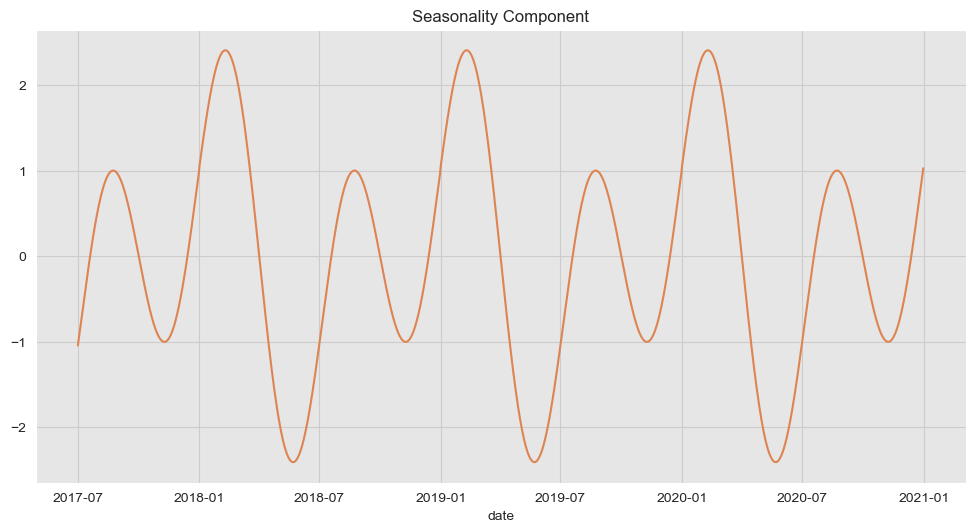

In [158]:
fig, ax = plt.subplots()
sns.lineplot(x='date', y='seas', data=data_df, color=sns_c[1], ax=ax)
ax.set(title='Seasonality Component', ylabel='');

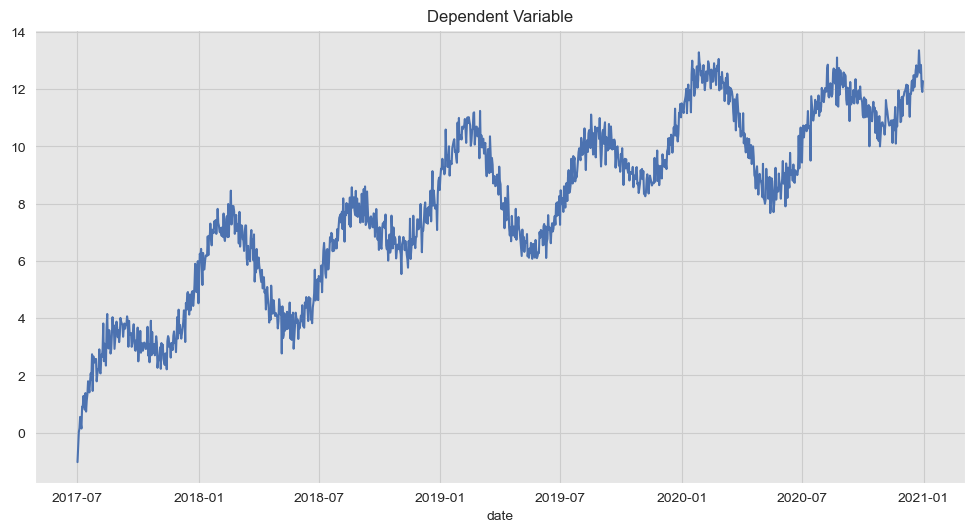

In [159]:
fig, ax = plt.subplots()
sns.lineplot(x='date', y='y', data=data_df, ax=ax)
ax.set(title='Dependent Variable', ylabel='');